# topic name : univarite numerical fill the missing value 

In [7]:
import pandas as pd 
import numpy as np
import matplotlib .pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn .impute import SimpleImputer
from sklearn .compose import ColumnTransformer
import seaborn as sns
import pickle
from sklearn .linear_model import LogisticRegression
from sklearn .pipeline import Pipeline
import sys

In [23]:
print(pd.__version__)
print(np.__version__)
import packaging

print("Packaging library version:", packaging.__version__)

print(sys.version)
print("Pickle highest protocol supported:", pickle.HIGHEST_PROTOCOL)


2.2.2
1.26.4
Packaging library version: 24.1
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Pickle highest protocol supported: 5


In [3]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\titanic_toy.csv")

In [4]:
data

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
data.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
data.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
x=data.iloc[:,0:3]
y=data.iloc[:,-1]

In [8]:
x.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [9]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# use pandas 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [12]:
x_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [13]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [14]:
# use age columns 
age_mean=x_train["Age"].mean()
age_median=x_train["Age"].median()


Fare_mean=x_train["Fare"].mean()
Fare_median=x_train["Fare"].median()

In [15]:
x_train["age_mean"]=x_train["Age"].fillna(age_mean)
x_train["age_median"]=x_train["Age"].fillna(age_median)


x_train["fare_mean"]=x_train["Fare"].fillna(age_mean)
x_train["fare_median"]=x_train["Fare"].fillna(age_median)

In [16]:
x_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,29.498846,28.0000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


# visulations all columns 

<Axes: ylabel='Density'>

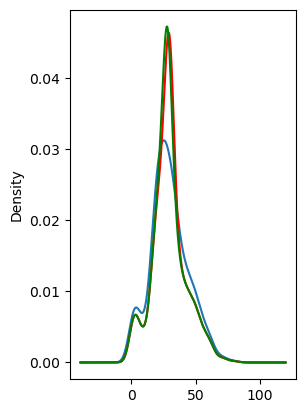

In [18]:
fig=plt.figure()
a=fig.add_subplot(121)

x_train["Age"].plot(kind="kde",ax=a)
x_train["age_mean"].plot(kind="kde",ax=a,color="red")
x_train["age_median"].plot(kind="kde",ax=a,color="green")

<Axes: ylabel='Density'>

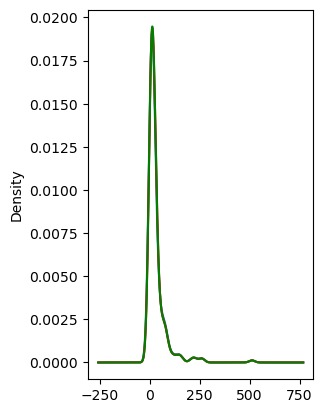

In [19]:
fig=plt.figure()
a=fig.add_subplot(121)
x_train["Fare"].plot(kind="kde",ax=a)
x_train["fare_mean"].plot(kind="kde",ax=a,color="red")
x_train["fare_median"].plot(kind="kde",ax=a,color="green")

In [20]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.008529,70.916562
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.659866,17.661074
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.026540,56.952682
age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.538695,60.458269
fare_mean,71.008529,2761.031435,17.659866,57.026540,60.538695,2621.670511,2621.888037
fare_median,70.916562,2761.031435,17.661074,56.952682,60.458269,2621.888037,2622.213561


In [21]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088692,0.088561
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204992,0.204985
age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085711,0.085591
age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.090894,0.090764
fare_mean,0.088692,1.000000,0.204992,0.085711,0.090894,1.000000,0.999979
fare_median,0.088561,1.000000,0.204985,0.085591,0.090764,0.999979,1.000000


<Axes: >

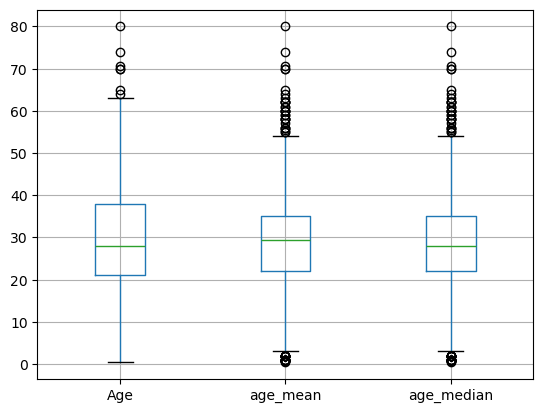

In [22]:
x_train[["Age","age_mean","age_median"]].boxplot()

<Axes: >

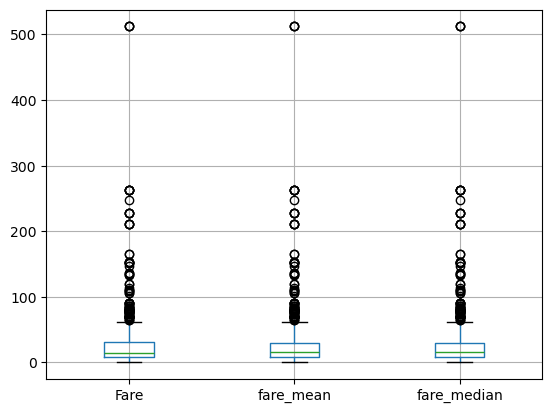

In [23]:
x_train[["Fare","fare_mean","fare_median"]].boxplot()

# use sklearn 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [26]:
impute_1=SimpleImputer(strategy="median")
impute_2=SimpleImputer(strategy="mean")

In [27]:
x_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [28]:
step_1=ColumnTransformer([
("impute_1",SimpleImputer(strategy="median"),[0]),
    ("impute_2",SimpleImputer(strategy="mean"),[1])
    
],remainder="passthrough")

In [29]:
step_2=LogisticRegression()

In [30]:
model=Pipeline([
("step_1",step_1),
("step_2",step_2)

    
])

In [31]:
model.fit(x_train,y_train)

,steps,"[('step_1', ...), ('step_2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_1', ...), ('impute_2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
file="model.pkl"

In [33]:
pickle.dump(model,open(file,"wb"))

In [35]:
pred=model.predict(x_test)

In [37]:
from sklearn .metrics import accuracy_score

In [39]:
score=accuracy_score(pred,y_test)

In [41]:
score

0.6536312849162011